# 일단 만들어보는 첫 번째 머신러닝 모델

### 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기



사이킷런을 이용한 붓꽃 데이터 분류
- 붓꽃 데이터 세트를 사용해서
- 붓꽃의 품종을 분류 (Classification)

붓꽃 데이터 세트
- sklearn.datasets에 들어 있음
- load_iris()를 통해 로드해서 사용
- 머신러닝 각 분야에서 알고리즘을 측정하기 위한 기본 자료로 다양하게 활용
- 4가지 속성(피처)을 가진 3가지 붓꽃 품종의 50개 샘플 포함

3가지 붓꽃 품종
- Setosa
- Versicolor
- Virginica


#### 그림01-붓꽃품종.JPG

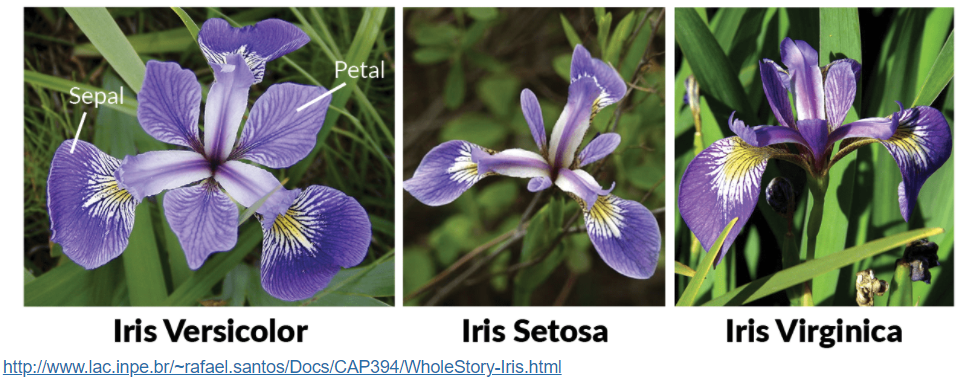

붓꽃의 4가지 속성(피처 (Feature))
- 꽃받침 길이 : Sepal Length
- 꽃받침 너비 : Sepal Width
- 꽃잎의 길이 : Petal Length
- 꽃잎의 너비 : Petal Width

#### 그림02-붓꽃.JPG

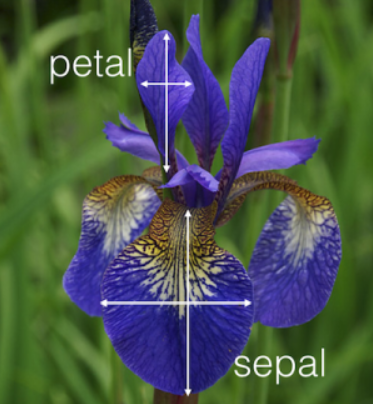

#### 붓꽃 데이터 세트 구성
- 그림03-붓꽃 데이터 세트 구성.JPG

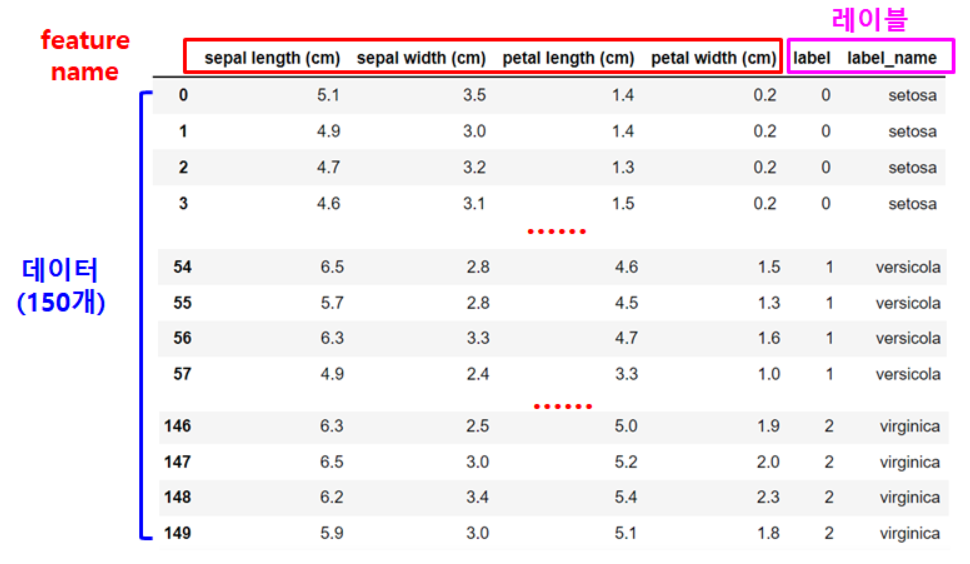

붓꽃 데이터 분류

분류(Classification) 
- 대표적인 지도학습 방법
- 학습을 위한 다양한 피처(속성)와 분류 결정값인 레이블(품종) 데이터로 모델을 학습한 후
- 별도의 테스트 데이터 세트에서 레이블(품종) 예측
- 즉, 학습 데이터로 학습한 후, 테스트 데이터의 데이터를 보고 어떤 품종인지 예측하는 것


- 학습 데이터 : 학습용 데이터 세트
- 테스트 데이터 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

#### 그림04-학습_테스트 데이터 셋.JPG

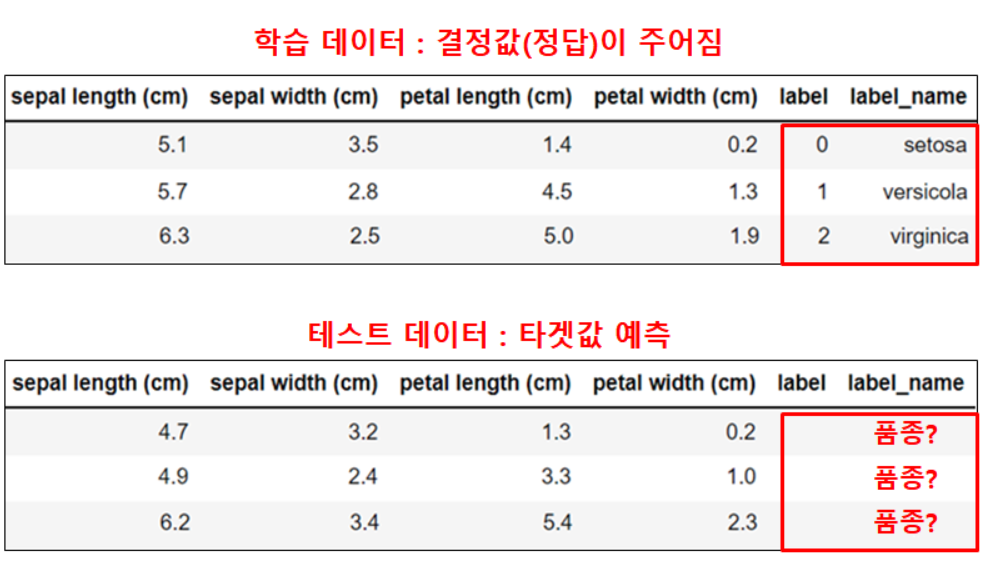

용어 정리

피처(Feature) : 데이터 세트 속성
- feature_names : sepal length, sepal with, petal length, petal width
    
레이블(label) :
- 품종 (setosa, versicolor, virginica)
- 학습 : 결정값(주어진 정답)
- 테스트 : 타깃값(target)(예측해야 할 값)
- target(숫자) : 0, 1, 2
- target_names : setosa, versicolor, virginica
- 레이블 = 결정값 = 타겟값

붓꽃 데이터 예측 프로세스

#### 그림05-붓꽃 데이터 예측 프로세스

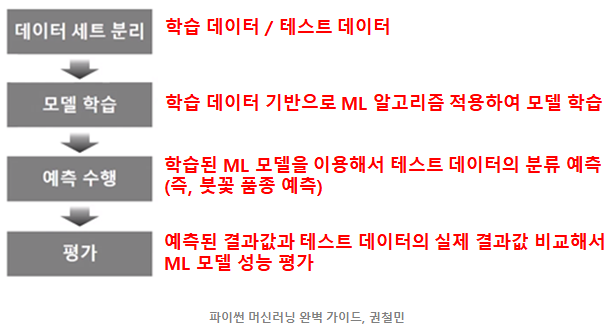

#### 사이킷런을 통한 모델 구성 및 학습

In [23]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

1.0.2


** 붓꽃 예측을 위한 사이킷런 필요 모듈 로딩 **

In [24]:
from sklearn.datasets import load_iris  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split

사이킷런 패키지 모듈
* 명명규칙 : 모듈명은 sklearn으로 시작
* sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈 모임
* sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스 모임
* sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나  
    최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    - 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터
        - 머신러닝 알고리즘의 성능 튜닝에 사용

붓꽃 데이터 예측 프로세스에서 사용하는 함수 및 클래스
* load_iris() 함수 : 붓꽃 데이터 세트
* DecisionTreeClassifier 클래스  : ML 알고리즘은 의사결정 트리 알고리즘 이용
* train_test_split() 함수 : 데이터 세트를 학습 데이터와 테스트 데이터로 분리

**데이터 세트 로딩**

In [25]:
import pandas as pd

In [26]:
# 붓꽃 데이터 세트 로딩
iris = load_iris()
iris # dict 형태로 제공됨

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
# 각 feature의 실제 값들이 저장되어 있음
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
# iris.target : 결정값(종속변수)이 저장되어 있음
iris_label = iris.target
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# 결정값의 의미
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
# 특성명 (feature_names)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
# df 변환
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 학습 데이터와 테스트 데이터 세트로 분리

train_test_split() 함수 사용
* train_test_split(iris_data, iris_label, test_size=0.3, random_state=11)
* train_test_split(피처 데이터 세트, 레이블 데이터 세트, 테스트 데이터 세트 비율, 난수 발생값)
* 피처 데이터 세트 : 피처(feature)만으로 된 데이터(numpy) [5.1, 3.5, 1.4, 0.2],...
* 레이블 데이터 세트 : 레이블(결정 값) 데이터(numpy) [0 0 0 ... 1 1 1 .... 2 2 2]  
* 테스트 데이터 세트 비율 : 전체 데이터 세트 중 테스트 데이터 세트 비율 (0.3)
* 난수 발생값 : 수행할 때마다 동일한 데이터 세트로 분리하기 위해 시드값 고정 (실습용)

train_test_split() 반환값
* X_train : 학습용 피처 데이터 세트  (feature)
* X_test : 테스트용 피처 데이터 세트  (feature)
* y_train : 학습용 레이블 데이터 세트 (target)
* y_test : 테스트용 레이블 데이터 세트 (target)

* feature : 대문자 X_
* label(target) : 소문자 y_

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                        test_size = 0.2, random_state=11)

** 학습 데이터 세트로 학습(Train) 수행 **

#### ML 알고리즘으로 의사결정 트리 알고리즘을 이용해서 학습과 예측 수행  
- DecisionTreeClassifier 클래스의 fit()/predict() 메소드 사용  
- fit() : 학습 수행 (학습용 데이터)
    - fit(학습용 피처 데이터, 학습용 레이블(정답) 데이터)
- predict() : 예측 수행
    - predict(테스트용 피처 데이터)

In [33]:
# 빈모델 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [34]:
dt_clf

DecisionTreeClassifier(random_state=11)

####  테스트 데이터 세트로 예측(Predict) 수행 

In [35]:
# 학습이 완료된 model을 이용해서 예측
pred = dt_clf.predict(X_test)

In [37]:
print(pred)
print(y_test)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [39]:
print(y_train)

[0 2 2 0 0 2 2 1 0 1 1 2 0 1 2 1 1 0 2 0 2 2 1 2 1 0 0 1 0 0 2 2 2 0 0 0 1
 0 1 2 2 1 1 2 2 0 1 1 2 2 2 0 2 0 0 0 0 2 0 0 0 1 0 1 1 2 1 0 0 0 1 1 1 2
 1 0 1 2 0 2 2 1 0 0 0 2 1 0 2 1 2 0 0 1 1 2 1 2 2 1 1 2 2 0 1 2 0 2 2 0 1
 2 0 1 1 1 0 1 1 1]


#### 예측 정확도 평가 

#### 예측 결과를 기반으로  
- 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능 평가  
- 머신러닝 모델의 여러 성능 평가 방법 중 정확도 측정  
    - 정확도 : 예측 결과 실제 레이블 값과 얼마자 정확하게 맞는지 평가하는 지표  
    - 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인  
    - 정확도 측정을 위해 사이킷런에서 제공하는 accuracy_score() 함수 사용  
- accuracy_score(실제 테스트용 레이블 데이터 세트, 예측된 레이블 데이터 세트)

In [40]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


###### 붓꽃 데이터 품종 예측 프로세스 정리 #####
0. 데이터 준비 (데이터 로드 / 데이터 확인) : load_iris() 함수 사용  
1. 학습 데이터와 테스트 데이터 세트로 분리 : train_test_split() 함수 사용  
2. 학습 수행 : DecisionTreeClassifier 클래스의 fit()/predict() 메소드 사용  
        fit() : 학습용 데이터 사용  
        predict() : 테스트용 피처 데이터 사용  
3. 예측 정확도 평가 () : accuracy_score() 함수 사용  
    - 실제 테스트용 레이블 데이터 세트와 예측된 레이블 데이터 세트 비교해서   
    - 예측 정확도 측정

In [16]:
iris.filename

'iris.csv'

In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =